In [8]:
import numpy as np #berfungsi untuk memanggil atau memasukkan library numpy yang diinisialisasikan dengan np
import matplotlib.pyplot as plt #berfungsi untuk memanggil atau memasukkan library matplotlib.pyplot yang diinisialisasikan dengan plt
import cv2 as cv #berfungsi untuk memanggil atau memasukkan library cv2 yang diinisialisasikan dengan cv

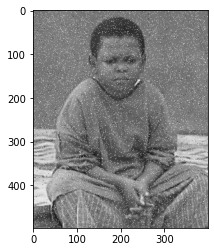

In [11]:
img = cv.imread("osita.JPG") #berfungsi untuk membaca, mengimport dan menampilkan atau memunculkan file osita.jpg
plt.imshow(img)

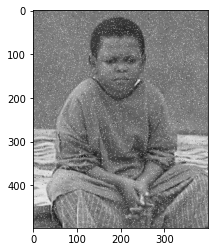

In [12]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY) #berfungsi untuk merubah warna gambar menjadi gray atau abu-abu
plt.imshow(gray_img, cmap='gray')

# MEDIAN FILTERING

In [13]:
def median(matriks): #membuat fungsi median dengan parameter matriks
    array = np.sort(matriks, axis = None) #menginisialisasi variabel array yang diisi oleh nilai dari parameter matriks dan diurutkan nilainya
    total = len(array) #menginisialisasi variabel total yang berisi sepanjang nilai array yang sudah diinisialisasikan sebelumnya
    return(array[int((total-1)/2)]) #berfungsi untuk mengembalikan nilai array pada indeks total, perhitungan dari variabel total jika hasilnya terdapat koma makan akan di bulatkan menjadi int

def medianFilter(img, horizontal, vertical): #membuat fungsi medianFilter dengan paramater img, horizontal dan vertical
    tinggi, lebar = img.shape #menginisialisasi variabel tinggi dan lebar yang diisi oleh nilai dari piksel gambar
    hasil = np.zeros(img.shape) #membuat matriks kosong sesuai dengan ukuran piksel gambar
    horizontal2, vertical2 = int((horizontal-1)/2), int((vertical-1)/2) #menginisialisasi variabel horizontal2 dan vertical2 yang berisi nilai dari parameter horizontal dan vertical dan akan diberi nilai nantinya parameter tersebut sesuai yang diinputkan, jika nilai memiliki koma maka akan dibulatkan ke int
    pad = np.pad(img, ((horizontal2, horizontal-horizontal2-1), (vertical2, vertical-vertical2-1)), 'edge') #menginisialisasi veriabel pad yang berisi nilai dari parameter img yang menjadi array nya, hasil dari perhitungan lebar citra dan edge yang berarti tepi nya berisi nilai dari array
    for i in range(tinggi):
        for j in range(lebar):
            hasil[i,j] = median(pad[i:i+horizontal, j:j+vertical])
    return hasil #berfungsi untuk mengembalikan nilai dari variabel hasil

Script diatas merupakan kode yang digunakan untuk proses menentukan median filtering. Langkah yang dilakukan yaitu adalah dengan memasukkan nilai matriks terlebih dahulu kemudian menghitung matriks sesuai rumus median. Hasil yang diperoleh di olah lagi dengan cara melakukan perulangan pada tinggi dan lebar dari image.

Text(0.5, 1.0, 'Median 7x7')

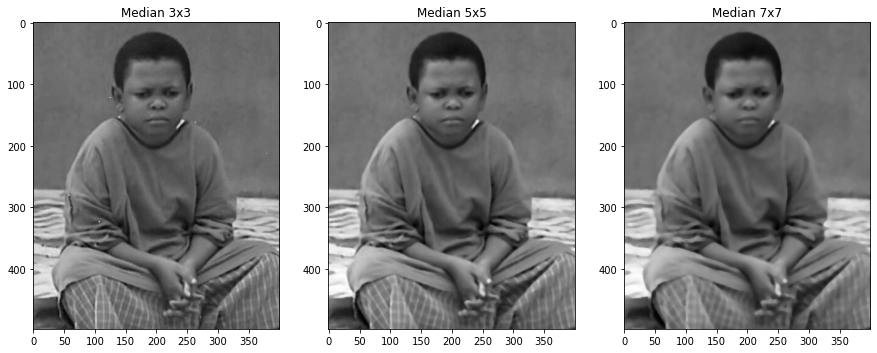

In [53]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 3, 1)
plt.imshow(medianFilter(gray_img, 3, 3), cmap='gray')
plt.title('Median 3x3')
fig.add_subplot(1, 3, 2)
plt.imshow(medianFilter(gray_img, 5, 5), cmap='gray')
plt.title('Median 5x5')
fig.add_subplot(1, 3, 3)
plt.imshow(medianFilter(gray_img, 7, 7), cmap='gray')
plt.title('Median 7x7')

# MEAN FILTERING

In [14]:
def mean (matriks): #membuat fungsi mean dengan parameter matriks
    array = np.sum(matriks) #menginisialisasi variabel array yang berisi hasil dari nilai paramater matriks
    horizontal, vertical = matriks.shape #menginisialisasi variabel horizontal dan vertical yang diisi oleh nilai dari piksel gambar
    return(array/(horizontal*vertical)) #berfungsi untuk mengembalikan nilai hasil dari pembagian nilai pada array dan hasil dari horizontal dikali vertical

def meanFilter(img, horizontal, vertical): #membuat fungsi meanFilter dengan parameter img, horizontal dan vertical
    tinggi, lebar = img.shape #menginisialisasi variabel tinggi dan lebar yang diisi oleh nilai dari piksel gambar
    hasil = np.zeros(img.shape) #membuat matriks kosong sesuai dengan ukuran piksel gambar
    horizontal2, vertical2 = int((horizontal-1)/2), int((vertical-1)/2) #menginisialisasi variabel horizontal2 dan vertical2 yang berisi nilai dari parameter horizontal dan vertical dan akan diberi nilai nantinya parameter tersebut sesuai yang diinputkan, jika nilai memiliki koma maka akan dibulatkan ke int
    pad = np.pad (img, ((horizontal2, horizontal-horizontal2-1), (vertical2, vertical-vertical2-1)), 'edge') #menginisialisasi veriabel pad yang berisi nilai dari parameter img yang menjadi array nya, hasil dari perhitungan lebar citra dan edge yang berarti tepi nya berisi nilai dari array
    for i in range (tinggi):
        for j in range (lebar):
            hasil[i,j] = mean(pad[i:i+horizontal, j:j+vertical])
    return hasil #berfungsi untuk mengembalikan nilai dari variabel hasil

Script diatas merupakan kode yag digunakan untuk proses menentukan mean filtering. Langkah yang dilakukan yaitu dengan memasukkan nilai matriks terlebih dahulu kemudian menghitung matriks sesuai rumus mean yang ada. Hasil yang diperoleh di olah lagi dengan cara melakukan perulangan pada tinggi dan lebar dari image.

Text(0.5, 1.0, 'Mean 7x7')

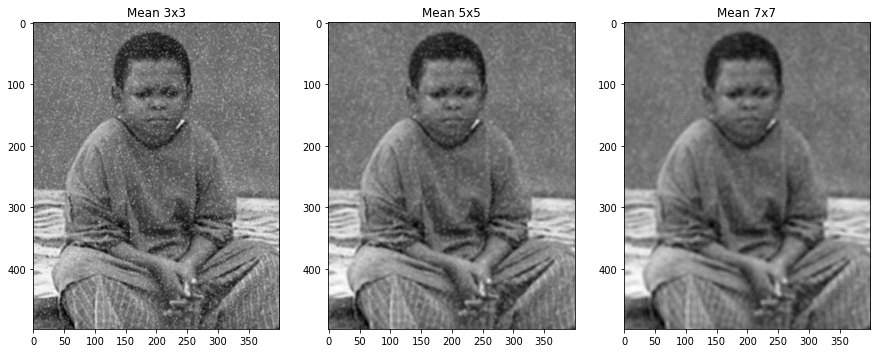

In [52]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 3, 1)
plt.imshow(meanFilter(gray_img, 3, 3), cmap='gray')
plt.title('Mean 3x3')
fig.add_subplot(1, 3, 2)
plt.imshow(meanFilter(gray_img, 5, 5), cmap='gray')
plt.title('Mean 5x5')
fig.add_subplot(1, 3, 3)
plt.imshow(meanFilter(gray_img, 7, 7), cmap='gray')
plt.title('Mean 7x7')

# MODUS FILTERING

In [44]:
def modus(matriks): #membuat fungsi modus dengan parameter matriks
    array = np.sort (matriks, axis = None) #menginisialisasi variabel array yang diisi oleh nilai dari parameter matriks dan diurutkan nilainya
    indeks = np.zeros(np.max(array)+1, dtype= int) #menginisialisasi variabel indeks yang berisi matriks baru dan diisi dengan nilai max dari variabel array+1 dan bertipe data int
    for i in range(len(array)): #perulangan yang dilakukan pada variabel array
        indeks[array[i]] += 1
        
    cek = np.max(indeks)
    for j in range(len(indeks)):
        if (indeks[j] == cek):
            return j #berfungsi untuk mengembalikan nilai dari variabel j
        
def modusFilter(img, horizontal, vertical): #membuat fungsi modusFilter dengan parameter img, horizontal dan vertical
    tinggi, lebar = img.shape #menginisialisasi variabel tinggi dan lebar yang diisi oleh nilai dari piksel gambar
    hasil = np.zeros(img.shape) #membuat matriks kosong sesuai dengan ukuran piksel gambar
    horizontal2, vertical2 = int((horizontal-1)/2), int((vertical-1)/2) #menginisialisasi variabel horizontal2 dan vertical2 yang berisi nilai dari parameter horizontal dan vertical dan akan diberi nilai nantinya parameter tersebut sesuai yang diinputkan, jika nilai memiliki koma maka akan dibulatkan ke int
    pad = np.pad (img, ((horizontal2, horizontal-horizontal2-1), (vertical2, vertical-vertical2-1)), 'edge') #menginisialisasi veriabel pad yang berisi nilai dari parameter img yang menjadi array nya, hasil dari perhitungan lebar citra dan edge yang berarti tepi nya berisi nilai dari array
    for i in range (tinggi):
        for j in range (lebar):
            hasil[i,j] = modus(pad[i:i+horizontal, j:j+vertical])
    return hasil #berfungsi untuk mengembalikan nilai dari variabel hasil

Script diatas merupakan kode yag digunakan untuk proses menentukan modus filtering. Langkah yang dilakukan yaitu dengan memasukkan nilai matriks terlebih dahulu kemudian menghitung matriks dengan menghitung angka yang paling sering muncul kemudian dilakukan pengecekan angka yang sering muncul. Hasil yang diperoleh di olah lagi dengan cara melakukan perulangan pada tinggi dan lebar dari image.

Text(0.5, 1.0, 'Modus 7x7')

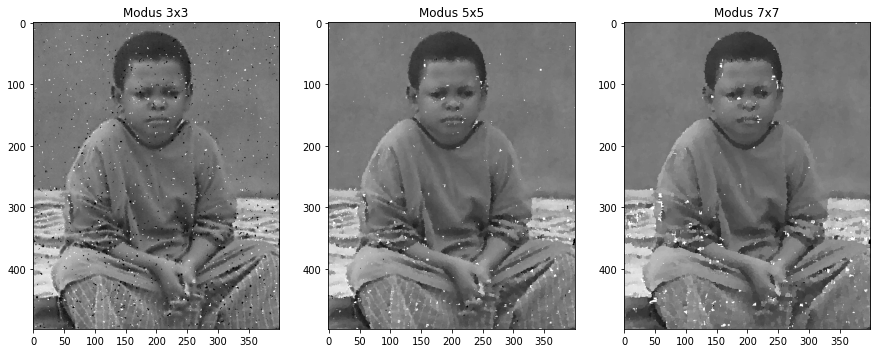

In [50]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 3, 1)
plt.imshow(modusFilter(gray_img, 3, 3), cmap='gray')
plt.title('Modus 3x3')
fig.add_subplot(1, 3, 2)
plt.imshow(modusFilter(gray_img, 5, 5), cmap='gray')
plt.title('Modus 5x5')
fig.add_subplot(1, 3, 3)
plt.imshow(modusFilter(gray_img, 7, 7), cmap='gray')
plt.title('Modus 7x7')